   ## By using KMeans clustering algorithm

In [1]:
import pandas as pd 
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/13_kmeans/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


## Data visualization by using scatter plot

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

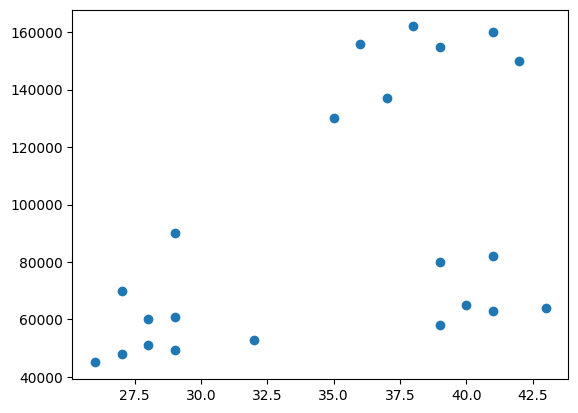

In [3]:
plt.scatter(df.Age,df['Income($)'])

## Building KMeans algorithm model...

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

In [5]:
y_predicted = model.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

Text(0, 0.5, 'Income($)')

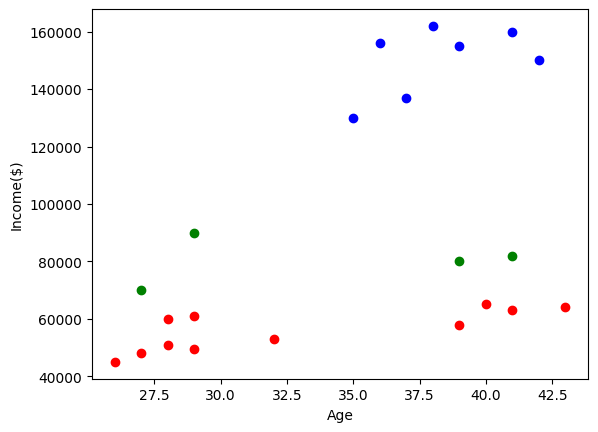

In [8]:
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.xlabel('Age')
plt.ylabel('Income($)')

## using MinMaxScaler to represent cluster datapoints clearly......in certain range

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']]) 
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


## after implementing MinMaxScaler..

In [11]:
model = KMeans(n_clusters = 3)
y_predicted = model.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [12]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

Text(0, 0.5, 'Income($)')

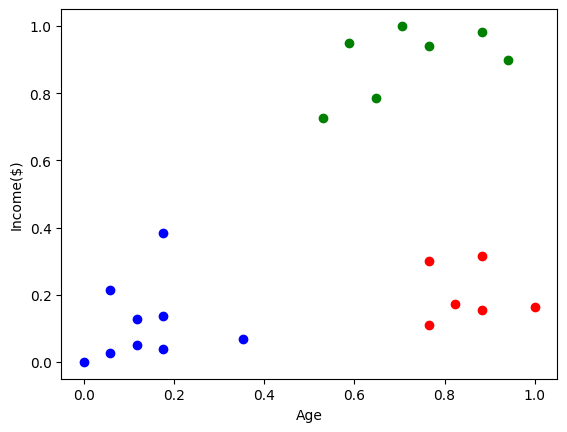

In [14]:
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.xlabel('Age')
plt.ylabel('Income($)')

## centroid concept...

In [15]:
model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income($)')

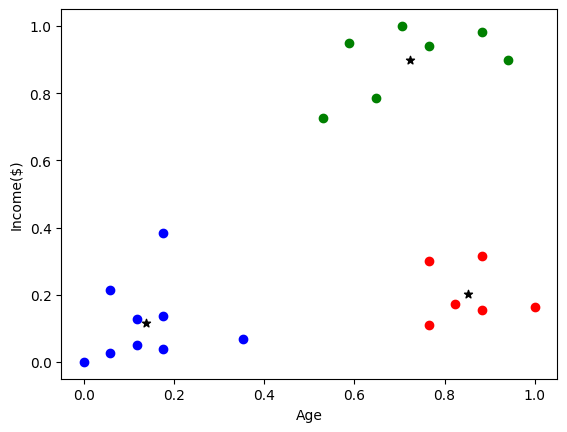

In [16]:
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black', marker='*')
## model.cluster_centers_[:,0] --->> total rows till first column
## model.cluster_centers_[:,1] --->> total rows till second column

plt.xlabel('Age')
plt.ylabel('Income($)')

In [17]:
model.inertia_

0.4750783498553096

## predicting K value by using elbow method

In [18]:
k_rng = range(1,11)
sse = []    ## sum of suared error

for k in k_rng:
    model = KMeans(n_clusters = k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)
    

In [19]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472493,
 0.1685851223602976,
 0.14391444958090924,
 0.10188787724979426,
 0.08026197041664467]

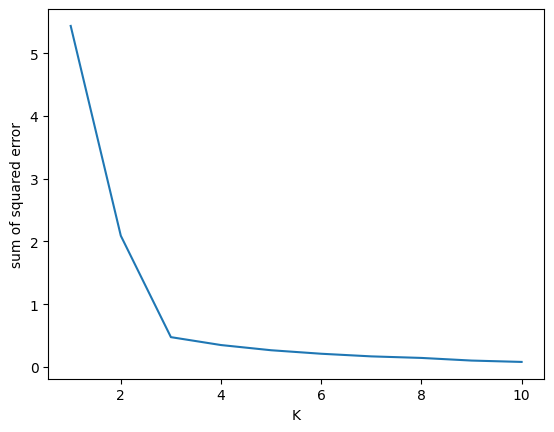

In [20]:
plt.xlabel('K')
plt.ylabel('sum of squared error')

plt.plot(k_rng,sse)

## by visualizing above graph using elbow visual K = 3 for given problem